In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm

from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import acf, pacf, plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import pickle

In [2]:
data = pd.read_csv(r"C:\Users\aksha\Desktop\Internship\Ai Varient\Demand Forecasting\train (2).csv")

In [3]:
data['date'] = pd.to_datetime(data['date'])

In [4]:
data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


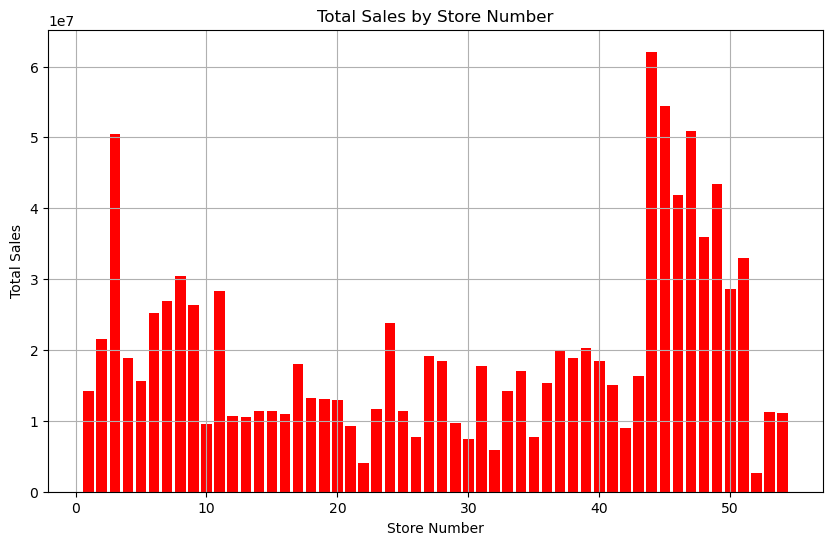

In [5]:
store_sales = data.groupby('store_nbr')['sales'].sum()
plt.figure(figsize=(10,6))
plt.bar(store_sales.index, store_sales.values, color ='red')
plt.title('Total Sales by Store Number')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

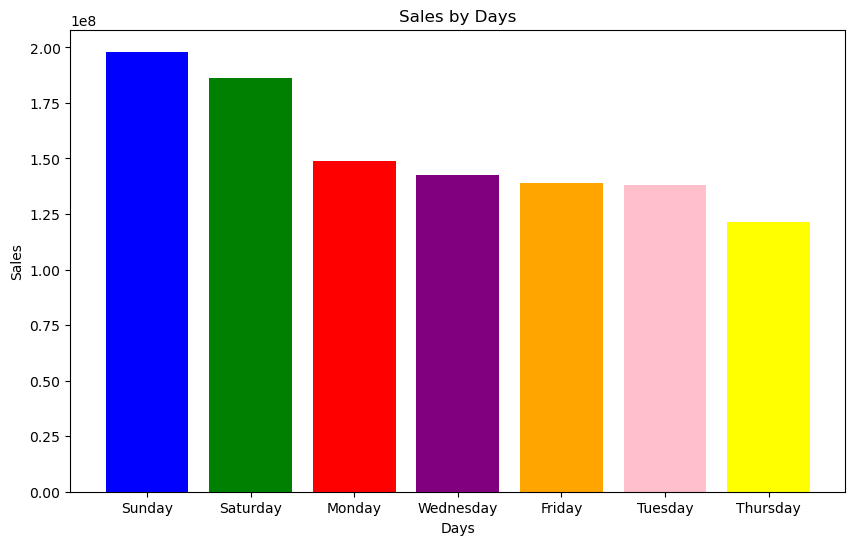

In [6]:
colors = ['blue', 'green', 'red', 'purple', 'orange','pink','yellow']
data['days'] = data['date'].dt.day_name()
weekdays_sales = data.groupby(data['days'])['sales'].sum()
weekdays_sales = weekdays_sales.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(weekdays_sales.index, weekdays_sales.values, color=colors)
plt.title('Sales by Days')
plt.xlabel('Days')
plt.ylabel('Sales')
plt.show()

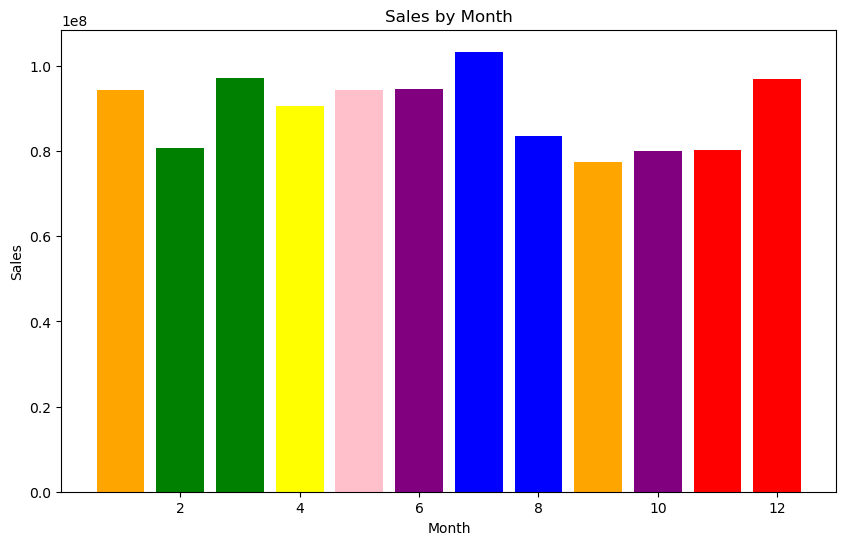

In [7]:
data['month'] = data['date'].dt.month
month_sales = data.groupby(data['month'])['sales'].sum()
month_sales = month_sales.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(month_sales.index, month_sales.values, color=colors)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [8]:
data

,id,date,store_nbr,family,sales,onpromotion,days,month
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Tuesday,1
1,1,2013-01-01,1,BABY CARE,0.000,0,Tuesday,1
2,2,2013-01-01,1,BEAUTY,0.000,0,Tuesday,1
3,3,2013-01-01,1,BEVERAGES,0.000,0,Tuesday,1
4,4,2013-01-01,1,BOOKS,0.000,0,Tuesday,1
...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Tuesday,8
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Tuesday,8
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Tuesday,8
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Tuesday,8


In [9]:
data1 = data.set_index('date')

<AxesSubplot:xlabel='date'>

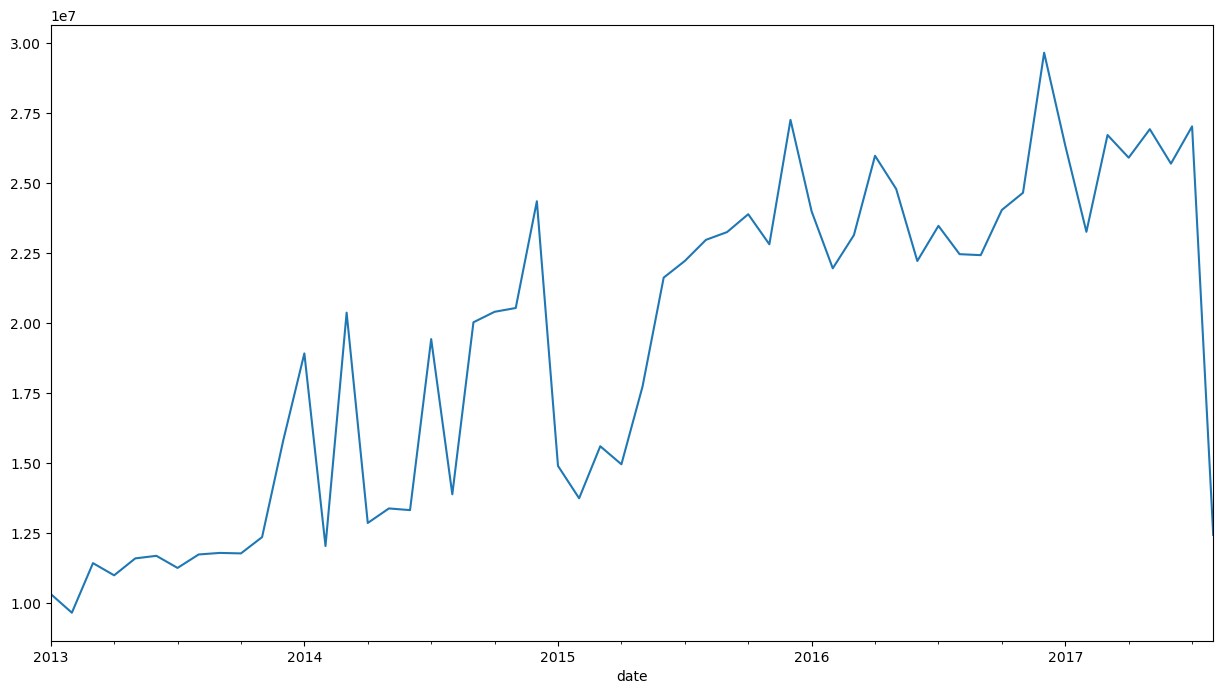

In [10]:
data1_month = data1.resample('M').sum()
plt.figure(figsize=(15,8))
data1_month['sales'].plot()

<AxesSubplot:xlabel='date'>

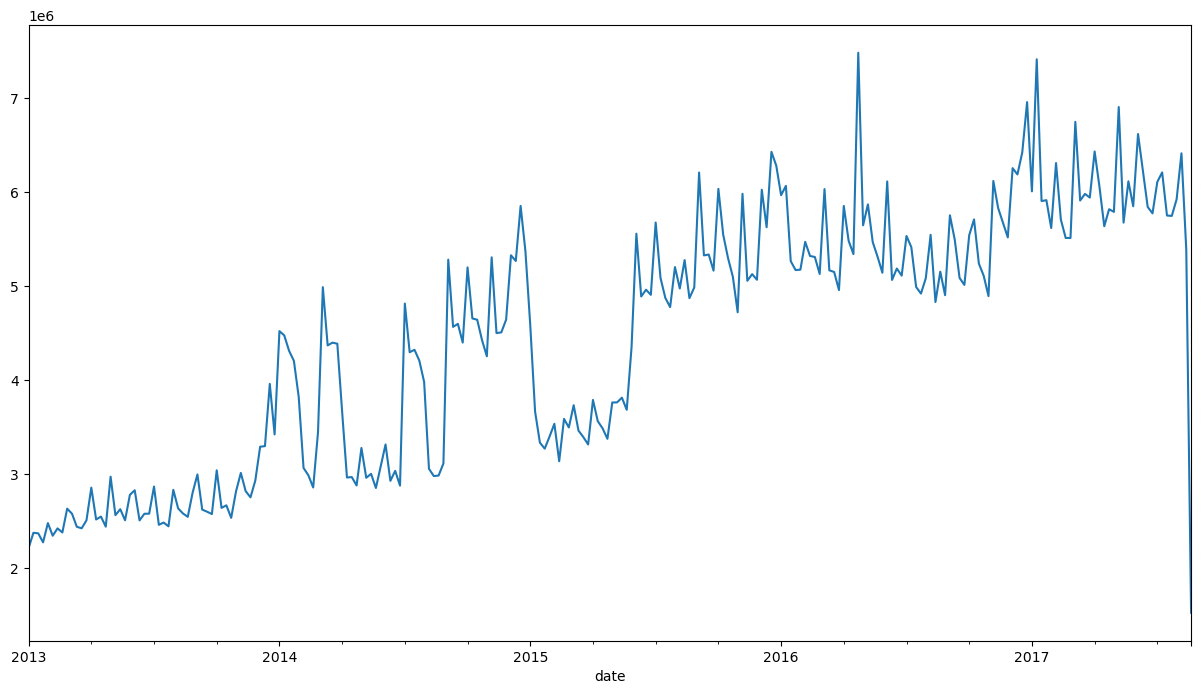

In [11]:
data1_week = data1.resample('W').sum()
plt.figure(figsize=(15,8))
data1_week['sales'].plot()

In [12]:
smax_data = data.drop(data.iloc[:,[0,2,3,5,6,7]], axis=1)
smax_data = smax_data.set_index('date')
smax_data

,sales
date,
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
2013-01-01,0.000
...,...
2017-08-15,438.133
2017-08-15,154.553
2017-08-15,2419.729


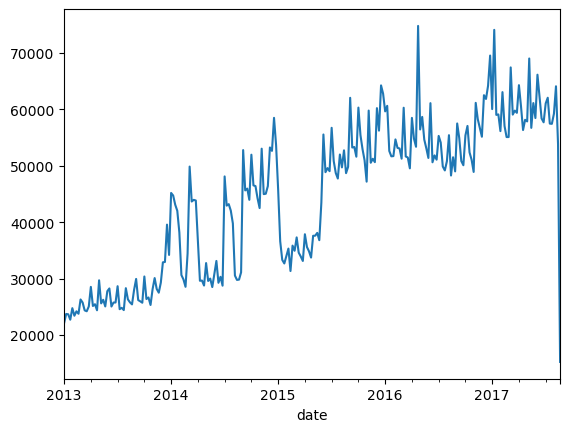

<Figure size 2000x1000 with 0 Axes>

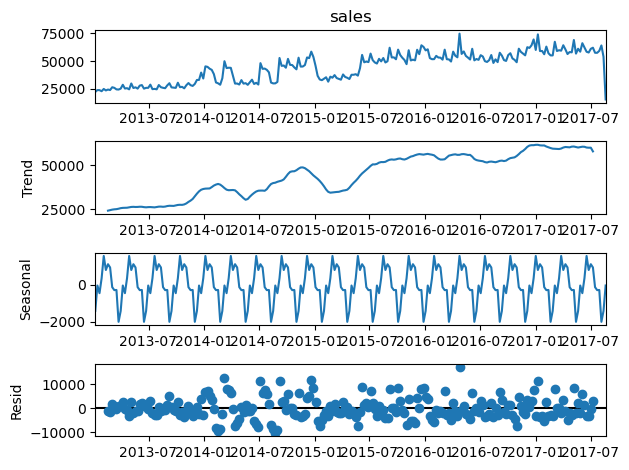

In [13]:
weekly_data = smax_data.resample('W').sum()//100
weekly_data['sales'].plot()

plt.figure(figsize=(20,10))
decompose_ts_add = seasonal_decompose(weekly_data.sales,period=12) #period 12 is 
decompose_ts_add.plot()
plt.show()

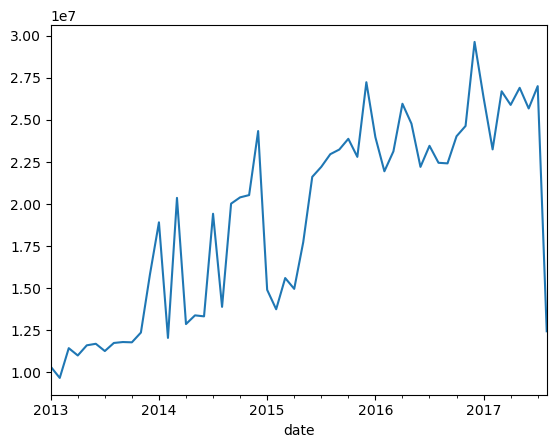

<Figure size 2000x1000 with 0 Axes>

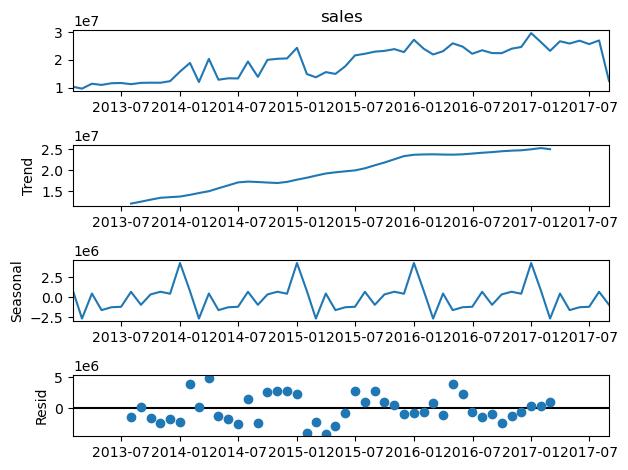

In [14]:
monthly_data = smax_data.resample('M').sum()
monthly_data['sales'].plot()

plt.figure(figsize=(20,10))
decompose_ts_add = seasonal_decompose(monthly_data.sales,period=12) #period 12 is 
decompose_ts_add.plot()
plt.show()

In [15]:
weekly_data

,sales
date,
2013-01-06,22115.0
2013-01-13,23736.0
2013-01-20,23680.0
2013-01-27,22721.0
2013-02-03,24768.0
...,...
2017-07-23,57443.0
2017-07-30,59218.0
2017-08-06,64101.0


In [16]:
weekly_data = weekly_data.iloc[:241]
weekly_data

,sales
date,
2013-01-06,22115.0
2013-01-13,23736.0
2013-01-20,23680.0
2013-01-27,22721.0
2013-02-03,24768.0
...,...
2017-07-16,57485.0
2017-07-23,57443.0
2017-07-30,59218.0


In [17]:
train, test= train_test_split(weekly_data, train_size=0.8, shuffle=False)

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


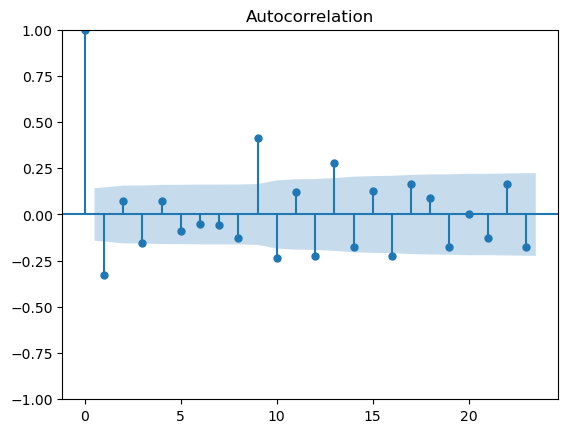

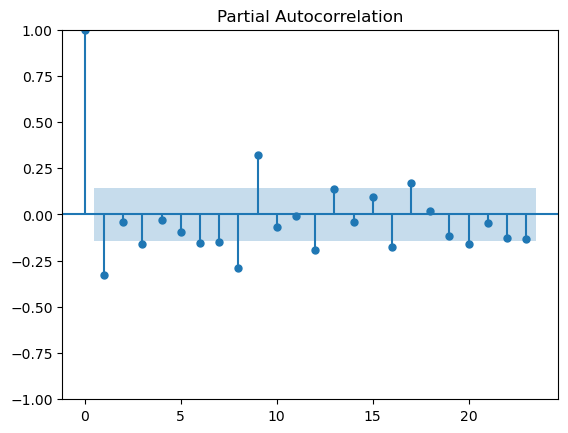

In [18]:
plot_acf(train.diff().dropna())
plot_pacf(train.diff().dropna())
plt.show()

In [19]:
sarimax_model = SARIMAX(train, order=(3,1,3), seasonal_order=(3,1,3,19))
sarimax_fit = sarimax_model.fit()
sarimax_fit.summary()

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                  192
Model:             SARIMAX(3, 1, 3)x(3, 1, 3, 19)   Log Likelihood               -1734.769
Date:                            Mon, 11 Sep 2023   AIC                           3495.539
Time:                                    15:42:45   BIC                           3536.456
Sample:                                01-06-2013   HQIC                          3512.140
                                     - 09-04-2016                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1487      0.289     -3.970      0.000      -1.716      -0.582
ar.L2          0.4887      0.511      0.956      0.339      -0.513       1.491
ar.L3          0.7456      0.252      2.964      0.003       0.253       1.239
ma.L1          0.8900      0.248      3.587      0.000       0.404       1.376
ma.L2         -0.8592      0.265     -3.239      0.001      -1.379      -0.339
ma.L3         -0.8260      0.173     -4.778      0.000      -1.165      -0.487
ar.S.L19       0.1770     14.227      0.012      0.990     -27.707      28.061
ar.S.L38      -0.7201     22.484     -0.032      0.974     -44.789      43.348
ar.S.L57      -0.3070      7.499     -0.041      0.967     -15.005      14.391
ma.S.L19      -1.1298     14.269     -0.079      0.937     -29.096      26.836
ma.S.L38       1.2266     20.798      0.059      0.953     -39.536      41.989
ma.S.L57      -0.5515     12.381     -0.045      0.964     -24.818      23.715
sigma2      5.759e+07   5.43e-05   1.06e+12      0.000    5.76e+07    5.76e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.48
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.52   Skew:                             0.83
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.81e+27. Standard errors may be unstable.
"""

In [20]:
predict_sarima = sarimax_fit.predict(start=len(train['sales']), end=len(train['sales'])+len(test['sales'])-1)
predict_sarima.index=test.index

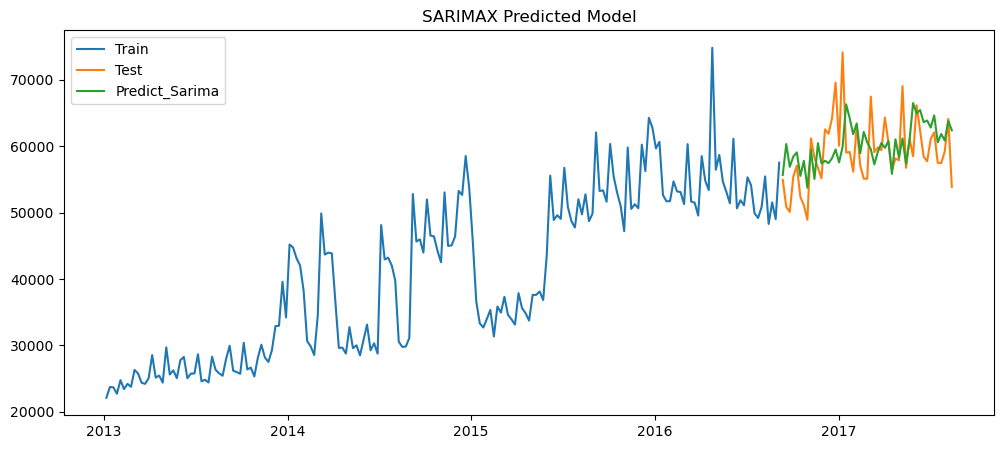

Rmse of Auto Arima : 25556831.516888306
Mape of Auto Arima : 0.06801117484486835


In [21]:
plt.figure(figsize=(12,5))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')
plt.plot(predict_sarima, label='Predict_Sarima')
plt.title('SARIMAX Predicted Model')
plt.legend()
plt.show()

rmse_of_SARIMAX = mean_squared_error(y_true= test, y_pred= predict_sarima)
mape_of_SARIMAX = mean_absolute_percentage_error(y_true= test, y_pred=predict_sarima)
print('Rmse of Auto Arima :',rmse_of_SARIMAX)
print('Mape of Auto Arima :',mape_of_SARIMAX)

In [22]:
future_dates = pd.date_range(start=test['sales'].index[-1], periods=30, freq='W')
weekly_forecast = sarimax_fit.predict(start=len(train['sales'])+len(test['sales']), end=len(train['sales'])+len(test['sales'])+30, dynamic=True)
weekly_forecast

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


2017-08-20    63972.454435
2017-08-27    59814.740115
2017-09-03    63115.087636
2017-09-10    62620.160281
2017-09-17    63073.471445
2017-09-24    62468.190544
2017-10-01    62488.580670
2017-10-08    71696.304284
2017-10-15    66273.416139
2017-10-22    69382.669298
2017-10-29    65373.533752
2017-11-05    66849.636711
2017-11-12    65313.315248
2017-11-19    67362.767874
2017-11-26    63881.373973
2017-12-03    63671.070258
2017-12-10    64781.944687
2017-12-17    65270.484542
2017-12-24    66641.192444
2017-12-31    65141.272261
2018-01-07    63844.675504
2018-01-14    64775.427767
2018-01-21    66482.175076
2018-01-28    65035.369834
2018-02-04    65457.440840
2018-02-11    65043.520398
2018-02-18    73643.556074
2018-02-25    69450.102776
2018-03-04    71222.901186
2018-03-11    69146.812281
2018-03-18    68445.064785
Freq: W-SUN, Name: predicted_mean, dtype: float64

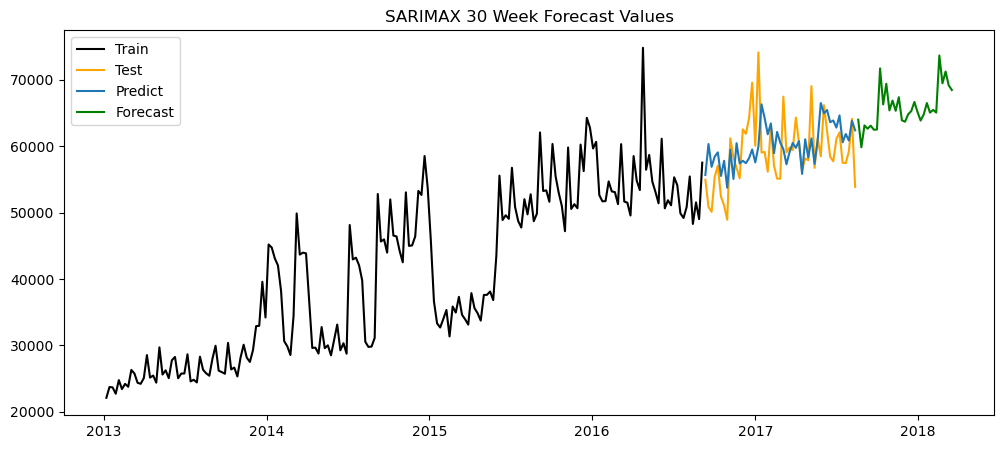

In [23]:
# Plot the predicted values
plt.figure(figsize=(12,5))
plt.plot(train.index, train["sales"], label='Train',color="black")
plt.plot(test.index, test["sales"], label='Test',color="orange")
plt.plot(predict_sarima, label='Predict')
plt.title('SARIMAX 30 Week Forecast Values')

plt.plot(weekly_forecast, label='Forecast',color="Green")
plt.legend()
plt.show()

In [24]:
pickle.dump(sarimax_fit,open('Deploy.pkl','wb'))